# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [3]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [4]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [5]:
x_vals.shape

(200,)

In [6]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


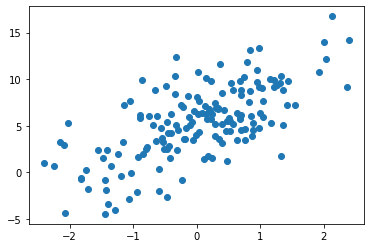

In [7]:
plt.scatter(x_train, y_train)

In [8]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out
    
    def add_units(self, n_new):
        # take a copy of the current weights stored in self.linear
        current_in = self.linear[0].weight.data
        current_out = self.linear[2].weight.data

        # randomly initialize a tensor with the size of the wanted layer 
        hl_input = torch.zeros([n_new, current_in.shape[1]])
        nn.init.xavier_uniform_(hl_input, gain=nn.init.calculate_gain('relu'))
        hl_out = torch.zeros([current_out.shape[0], n_new])
        nn.init.xavier_uniform_(hl_out, gain=nn.init.calculate_gain('relu'))

        # concatenate the old weights with the new weights
        new_wi_in = torch.cat([current_in, hl_input], dim=0)
        new_wi_out = torch.cat([current_out, hl_out], dim=1)

        # reset weight and grad variables to new size
        linear_in = nn.Linear(current_in.shape[1], current_in.shape[0] + n_new)
        linear_out = nn.Linear(current_out.shape[1] + n_new, current_out.shape[0])

        # set the weight data to new values
        linear_in.weight = torch.nn.Parameter(new_wi_in)
        linear_out.weight = torch.nn.Parameter(new_wi_out)
        self.linear = nn.Sequential(linear_in,
                                    torch.nn.ReLU(),
                                    linear_out)

In [9]:
input_dim = 1
hidden_sizes = 100
output_dim = 1      
learningRate = 0.001 
epochs = 500

In [10]:
criterion = torch.nn.MSELoss() 

In [12]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    # add you code here
    if (h == 2):
        model=NN(input_dim, h, output_dim)
    else:
        model.add_units(h)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, momentum=0.95)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
#         print(inputs_train.shape)
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 38.39304733276367
h: 2 | epoch: 50, loss: 11.048480033874512
h: 2 | epoch: 100, loss: 8.72607421875
h: 2 | epoch: 150, loss: 8.497652053833008
h: 2 | epoch: 200, loss: 8.452279090881348
h: 2 | epoch: 250, loss: 8.4339599609375
h: 2 | epoch: 300, loss: 8.428339004516602
h: 2 | epoch: 350, loss: 8.426725387573242
h: 2 | epoch: 400, loss: 8.42598819732666
h: 2 | epoch: 450, loss: 8.425460815429688
h: 3 | epoch: 0, loss: 18.564311981201172
h: 3 | epoch: 50, loss: 8.587746620178223
h: 3 | epoch: 100, loss: 8.417068481445312
h: 3 | epoch: 150, loss: 8.37515640258789
h: 3 | epoch: 200, loss: 8.371541023254395
h: 3 | epoch: 250, loss: 8.37002182006836
h: 3 | epoch: 300, loss: 8.368654251098633
h: 3 | epoch: 350, loss: 8.367368698120117
h: 3 | epoch: 400, loss: 8.366182327270508
h: 3 | epoch: 450, loss: 8.365079879760742
h: 4 | epoch: 0, loss: 22.41048812866211
h: 4 | epoch: 50, loss: 8.511569023132324
h: 4 | epoch: 100, loss: 8.378682136535645
h: 4 | epoch: 150, loss: 8.

h: 21 | epoch: 100, loss: 7.907198905944824
h: 21 | epoch: 150, loss: 7.858185768127441
h: 21 | epoch: 200, loss: 7.832282066345215
h: 21 | epoch: 250, loss: 7.8181657791137695
h: 21 | epoch: 300, loss: 7.807008266448975
h: 21 | epoch: 350, loss: 7.7994256019592285
h: 21 | epoch: 400, loss: 7.79287052154541
h: 21 | epoch: 450, loss: 7.7866530418396
h: 22 | epoch: 0, loss: 21.543224334716797
h: 22 | epoch: 50, loss: 8.330354690551758
h: 22 | epoch: 100, loss: 7.893361568450928
h: 22 | epoch: 150, loss: 7.847081184387207
h: 22 | epoch: 200, loss: 7.824471950531006
h: 22 | epoch: 250, loss: 7.809613227844238
h: 22 | epoch: 300, loss: 7.800778865814209
h: 22 | epoch: 350, loss: 7.791208744049072
h: 22 | epoch: 400, loss: 7.779343605041504
h: 22 | epoch: 450, loss: 7.771035671234131
h: 23 | epoch: 0, loss: 10.583152770996094
h: 23 | epoch: 50, loss: 8.085643768310547
h: 23 | epoch: 100, loss: 7.874098300933838
h: 23 | epoch: 150, loss: 7.82387638092041
h: 23 | epoch: 200, loss: 7.7968797683

h: 40 | epoch: 50, loss: 7.804727077484131
h: 40 | epoch: 100, loss: 7.685762882232666
h: 40 | epoch: 150, loss: 7.63543701171875
h: 40 | epoch: 200, loss: 7.612306118011475
h: 40 | epoch: 250, loss: 7.603569030761719
h: 40 | epoch: 300, loss: 7.596457004547119
h: 40 | epoch: 350, loss: 7.5907440185546875
h: 40 | epoch: 400, loss: 7.5853681564331055
h: 40 | epoch: 450, loss: 7.5814690589904785
h: 41 | epoch: 0, loss: 22.032453536987305
h: 41 | epoch: 50, loss: 8.65676212310791
h: 41 | epoch: 100, loss: 7.732633113861084
h: 41 | epoch: 150, loss: 7.633628845214844
h: 41 | epoch: 200, loss: 7.601445198059082
h: 41 | epoch: 250, loss: 7.58681583404541
h: 41 | epoch: 300, loss: 7.578103065490723
h: 41 | epoch: 350, loss: 7.5719895362854
h: 41 | epoch: 400, loss: 7.566503047943115
h: 41 | epoch: 450, loss: 7.5623273849487305
h: 42 | epoch: 0, loss: 40.856388092041016
h: 42 | epoch: 50, loss: 9.484102249145508
h: 42 | epoch: 100, loss: 7.693668365478516
h: 42 | epoch: 150, loss: 7.6184463500

h: 58 | epoch: 450, loss: 7.568981170654297
h: 59 | epoch: 0, loss: 9.88498306274414
h: 59 | epoch: 50, loss: 7.881161689758301
h: 59 | epoch: 100, loss: 7.690859794616699
h: 59 | epoch: 150, loss: 7.636038780212402
h: 59 | epoch: 200, loss: 7.615596771240234
h: 59 | epoch: 250, loss: 7.602575778961182
h: 59 | epoch: 300, loss: 7.593813419342041
h: 59 | epoch: 350, loss: 7.585944175720215
h: 59 | epoch: 400, loss: 7.580325126647949
h: 59 | epoch: 450, loss: 7.5753326416015625
h: 60 | epoch: 0, loss: 28.554996490478516
h: 60 | epoch: 50, loss: 8.153072357177734
h: 60 | epoch: 100, loss: 7.703036308288574
h: 60 | epoch: 150, loss: 7.643969535827637
h: 60 | epoch: 200, loss: 7.613000392913818
h: 60 | epoch: 250, loss: 7.596139430999756
h: 60 | epoch: 300, loss: 7.586783409118652
h: 60 | epoch: 350, loss: 7.5793776512146
h: 60 | epoch: 400, loss: 7.573467254638672
h: 60 | epoch: 450, loss: 7.5684027671813965
h: 61 | epoch: 0, loss: 143.11001586914062
h: 61 | epoch: 50, loss: 8.622344970703

h: 77 | epoch: 350, loss: 7.501978874206543
h: 77 | epoch: 400, loss: 7.495305061340332
h: 77 | epoch: 450, loss: 7.489153861999512
h: 78 | epoch: 0, loss: 92.01358795166016
h: 78 | epoch: 50, loss: 13.135812759399414
h: 78 | epoch: 100, loss: 7.778031349182129
h: 78 | epoch: 150, loss: 7.618147850036621
h: 78 | epoch: 200, loss: 7.572878360748291
h: 78 | epoch: 250, loss: 7.554327964782715
h: 78 | epoch: 300, loss: 7.5437421798706055
h: 78 | epoch: 350, loss: 7.5357255935668945
h: 78 | epoch: 400, loss: 7.5287675857543945
h: 78 | epoch: 450, loss: 7.522547721862793
h: 79 | epoch: 0, loss: 10.334775924682617
h: 79 | epoch: 50, loss: 7.77755069732666
h: 79 | epoch: 100, loss: 7.634014129638672
h: 79 | epoch: 150, loss: 7.580775260925293
h: 79 | epoch: 200, loss: 7.558859825134277
h: 79 | epoch: 250, loss: 7.546170711517334
h: 79 | epoch: 300, loss: 7.5363593101501465
h: 79 | epoch: 350, loss: 7.529044151306152
h: 79 | epoch: 400, loss: 7.522536277770996
h: 79 | epoch: 450, loss: 7.51725

h: 96 | epoch: 250, loss: 7.489480495452881
h: 96 | epoch: 300, loss: 7.476617336273193
h: 96 | epoch: 350, loss: 7.461489677429199
h: 96 | epoch: 400, loss: 7.45395565032959
h: 96 | epoch: 450, loss: 7.446464538574219
h: 97 | epoch: 0, loss: 51.17289733886719
h: 97 | epoch: 50, loss: 8.655128479003906
h: 97 | epoch: 100, loss: 7.885380744934082
h: 97 | epoch: 150, loss: 7.528326511383057
h: 97 | epoch: 200, loss: 7.490189552307129
h: 97 | epoch: 250, loss: 7.476738929748535
h: 97 | epoch: 300, loss: 7.4673261642456055
h: 97 | epoch: 350, loss: 7.45907735824585
h: 97 | epoch: 400, loss: 7.451515197753906
h: 97 | epoch: 450, loss: 7.443994998931885
h: 98 | epoch: 0, loss: 104.3929672241211
h: 98 | epoch: 50, loss: 15.211198806762695
h: 98 | epoch: 100, loss: 8.158398628234863
h: 98 | epoch: 150, loss: 7.5856146812438965
h: 98 | epoch: 200, loss: 7.544498443603516
h: 98 | epoch: 250, loss: 7.529524803161621
h: 98 | epoch: 300, loss: 7.518250465393066
h: 98 | epoch: 350, loss: 7.509130954

In [13]:
model.linear[0].weight.shape

torch.Size([4949, 1])

In [14]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
#     print(predicted)

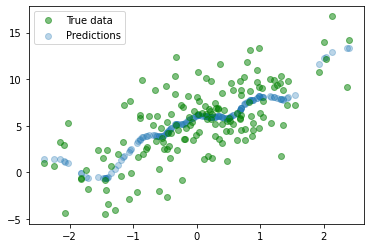

In [15]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.scatter(x_train, predicted, label='Predictions', alpha=0.3)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

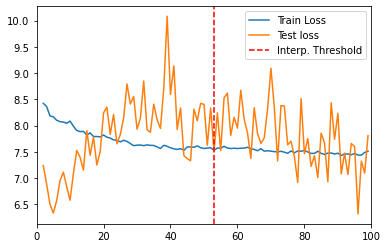

In [16]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

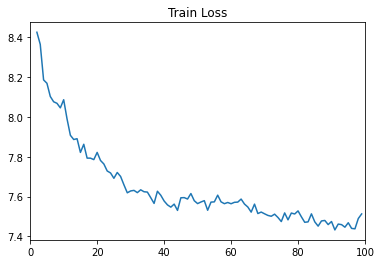

In [17]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

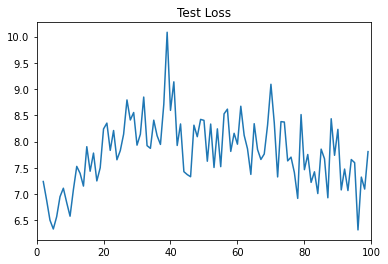

In [18]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)